In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import time
import sys
#sys.path.insert(0, '/Users/JuanLuis/git/Ecosystems/pruebas_cpp/')
import eco
import copy

In [5]:
start = time.time()
e = eco.Ecosystem()
e.initialize()
e.create_new_organisms(eco.OrganismType.PLANT_A, 500);
e.create_new_organisms(eco.OrganismType.PLANT_B, 0);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 5000);
e.create_new_organisms(eco.OrganismType.CARNIVORE, 500);
print("init time: {:.2f}ms".format(1000 * (time.time() - start)))

init time: 44.27ms


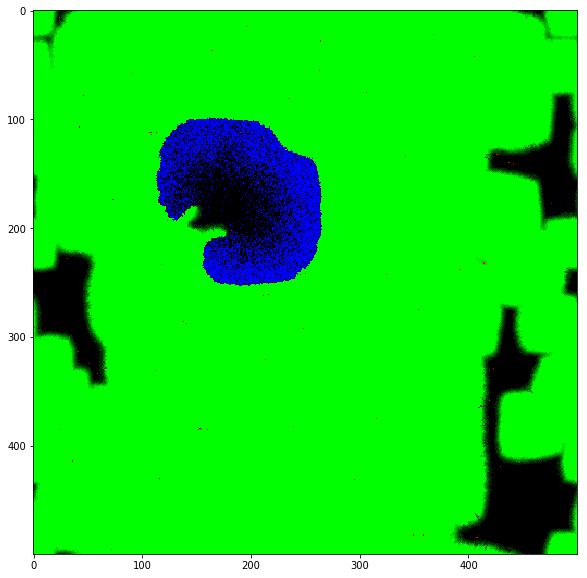

  3%|▎         | 262/10000 [02:01<1:28:17,  1.84it/s]

In [ ]:
num_iters = 10000
num_organisms = []
periodic_plot = 1
import tqdm
for i in tqdm.tqdm(range(num_iters)):
    start = time.time()
    try:
        e.evolve()
    except KeyboardInterrupt:
        break
    num_organisms.append(e.get_num_organisms())
    if i % periodic_plot == 0:
        m_a = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_A),
                     copy=False)
        m_b = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.HERBIVORE),
                     copy=False)
        m_c = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
        image = np.zeros((m_a.shape[0], m_a.shape[1], 3))
        image[:, :, 0] = m_c / 1000.0  # r
        image[:, :, 1] = m_a / 1000.0  # g
        image[:, :, 2] = m_b / 1000.0  # b
        clear_output(wait=True)
        plt.figure(figsize=(10, 10))
        plt.imshow(image, interpolation='None')
        plt.show()
        #plt.figure()
        #plt.plot(num_organisms, 'b')
        #plt.grid()
        #plt.xlabel('Cycle')
        #plt.ylabel('Num organisms')
        #plt.show()